<a href="https://colab.research.google.com/github/spegas/Dacon/blob/main/LG_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# google driver에 있는 데이터 공유를 위한 설치 패키지
!pip install gdrive_dataset

In [ ]:
# 예를 들어: https://drive.google.com/file/d/abcdefgABCDEFG1234567/view 이 있다면
# abcdefgABCDEFG1234567 이 위치가 file_id 입니다.

In [2]:
from gdrivedataset import loader

# file_id = # 이곳에 file_id 를 입력
file_id ='1DOYRWtzDlynJ0VJqDtdluzHXBzkJLZgE'
loader.load_from_google_drive(file_id)

========== files ============

data/test.zip
data/train.zip
data/train.csv
data/sample_submission.csv



In [ ]:
!unzip data/train.zip -d data

In [ ]:
!unzip data/test.zip - data

In [24]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from glob import glob
import os
import json 
import torch
from torch import nn
from torchvision import models
from torch.utils.data import Dataset
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [33]:
train_data_path_list = glob('data/train/*')

 -- train_data_path -- 
data/train/63832


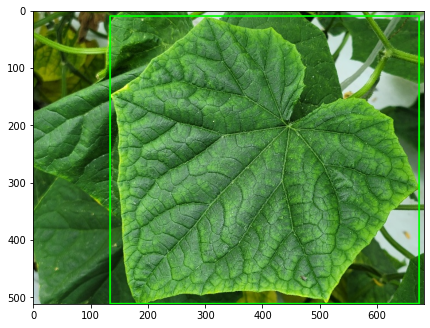

 -- train_data_path -- 
data/train/53736


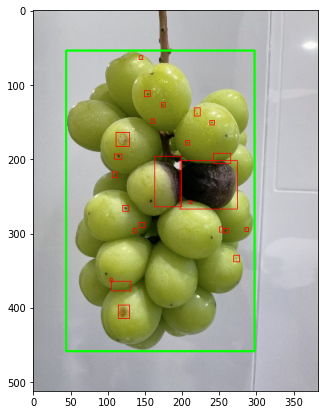

In [34]:
for train_data_path in train_data_path_list[:2]:
  print(" -- train_data_path -- ")
  print(train_data_path)

  sample_csv = pd.read_csv(glob(train_data_path+'/*.csv')[0])
  sample_image = cv2.imread(glob(train_data_path+'/*.jpg')[0])
  sample_json = json.load(open(glob(train_data_path+'/*.json')[0], 'r'))

  # visualize bbox
  plt.figure(figsize=(7,7))
  points = sample_json['annotations']['bbox'][0]
  part_points = sample_json['annotations']['part']
  img = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

  cv2.rectangle(
      img,
      (int(points['x']), int(points['y'])),
      (int((points['x']+points['w'])), int((points['y']+points['h']))),
      (0, 255, 0),
      2
  )
  for part_point in part_points:
      point = part_point
      cv2.rectangle(
          img,
          (int(point['x']), int(point['y'])),
          (int((point['x']+point['w'])), int((point['y']+point['h']))),
          (255, 0, 0),
          1
      )
  plt.imshow(img)
  plt.show()

In [59]:
class Train_info:
    def __init__(self):
      self.train_num = None
      self.csv_file_list = None
      self.imagme_file_list = None
      self.json_file_list = None

    def set_train_num(self, num):
      self.train_num = str(num)

    def set_csv_file_list(self, file_list):
      self.csv_file_list = file_list

    def set_image_file_list(self, file_list):
      self.image_file_list = file_list

    def set_json_file_list(self, file_list):
      self.json_file_list = file_list

    def get_train_num(self):
      return self.train_num

    def get_csv_file_list(self):
      return self.csv_file_list

    def get_image_file_list(self):
      return self.image_file_list

    def get_json_file_list(self):
      return self.json_file_list

In [61]:
train_info_list = []

In [ ]:
for train_data_path in train_data_path_list:
  print(" -- train_data_path -- ")
  print(train_data_path)

  train_num = train_data_path.split('/')[-1]

  new_train_info = Train_info()
  new_train_info.set_train_num(train_num)
  new_train_info.set_csv_file_list(glob(train_data_path+'/*.csv'))
  new_train_info.set_image_file_list(glob(train_data_path+'/*.jpg'))
  new_train_info.set_json_file_list(glob(train_data_path+'/*.json'))

  train_info_list.append(new_train_info)

In [ ]:
for train_info in train_info_list:
  print(train_info)
  print(train_info.get_train_num())
  print(train_info.get_csv_file_list())
  print(train_info.get_image_file_list())
  print(train_info.get_json_file_list())

In [67]:
test_data_path_list = glob('data/test/*')

 -- test_data_path -- 
data/test/11544


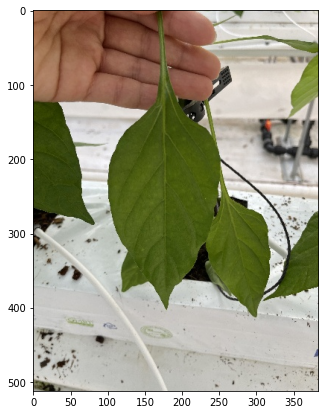

 -- test_data_path -- 
data/test/19719


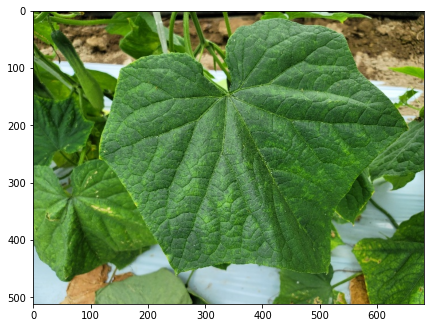

In [72]:
for test_data_path in test_data_path_list[:2]:
  print(" -- test_data_path -- ")
  print(test_data_path)

  sample_csv = pd.read_csv(glob(test_data_path+'/*.csv')[0])
  sample_image = cv2.imread(glob(test_data_path+'/*.jpg')[0])
  # sample_json = json.load(open(glob(test_data_path+'/*.json')[0], 'r'))

  # visualize bbox
  plt.figure(figsize=(7,7))
  # points = sample_json['annotations']['bbox'][0]
  # part_points = sample_json['annotations']['part']
  img = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

  # cv2.rectangle(
  #     img,
  #     (int(points['x']), int(points['y'])),
  #     (int((points['x']+points['w'])), int((points['y']+points['h']))),
  #     (0, 255, 0),
  #     2
  # )
  # for part_point in part_points:
  #     point = part_point
  #     cv2.rectangle(
  #         img,
  #         (int(point['x']), int(point['y'])),
  #         (int((point['x']+point['w'])), int((point['y']+point['h']))),
  #         (255, 0, 0),
  #         1
  #     )
  plt.imshow(img)
  plt.show()

In [74]:
class Test_info:
    def __init__(self):
      self.test_num = None
      self.csv_file_list = None

    def set_train_num(self, num):
      self.train_num = str(num)

    def set_csv_file_list(self, file_list):
      self.csv_file_list = file_list

    def get_train_num(self):
      return self.train_num

    def get_csv_file_list(self):
      return self.csv_file_list

In [75]:
test_info_list = []

In [ ]:
for test_data_path in test_data_path_list:
  print(" -- test_data_path -- ")
  print(test_data_path)

  test_num = test_data_path.split('/')[-1]

  new_test_info = Test_info()
  new_test_info.set_train_num(train_num)
  new_test_info.set_csv_file_list(glob(train_data_path+'/*.csv'))

  test_info_list.append(new_test_info)

In [ ]:
for test_info in test_info_list:
  print(test_info)
  print(test_info.get_train_num())
  print(test_info.get_csv_file_list())